# Problem Statement

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not

Importing Necessary Libraries

In [15]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#Importing Visualising Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)
import missingno as msno
import scikitplot as skplt

#Importing DataCleaning Libraries
from sklearn.model_selection import train_test_split

#Importing Classification Models 

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


#Importing Classification Model Evaluation Metrics 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

#Importing Hyperparameter Tuning model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#Importing Serialization libraries
import joblib

In [16]:
tt=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
tt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
tt.shape

(891, 12)

In [18]:
tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

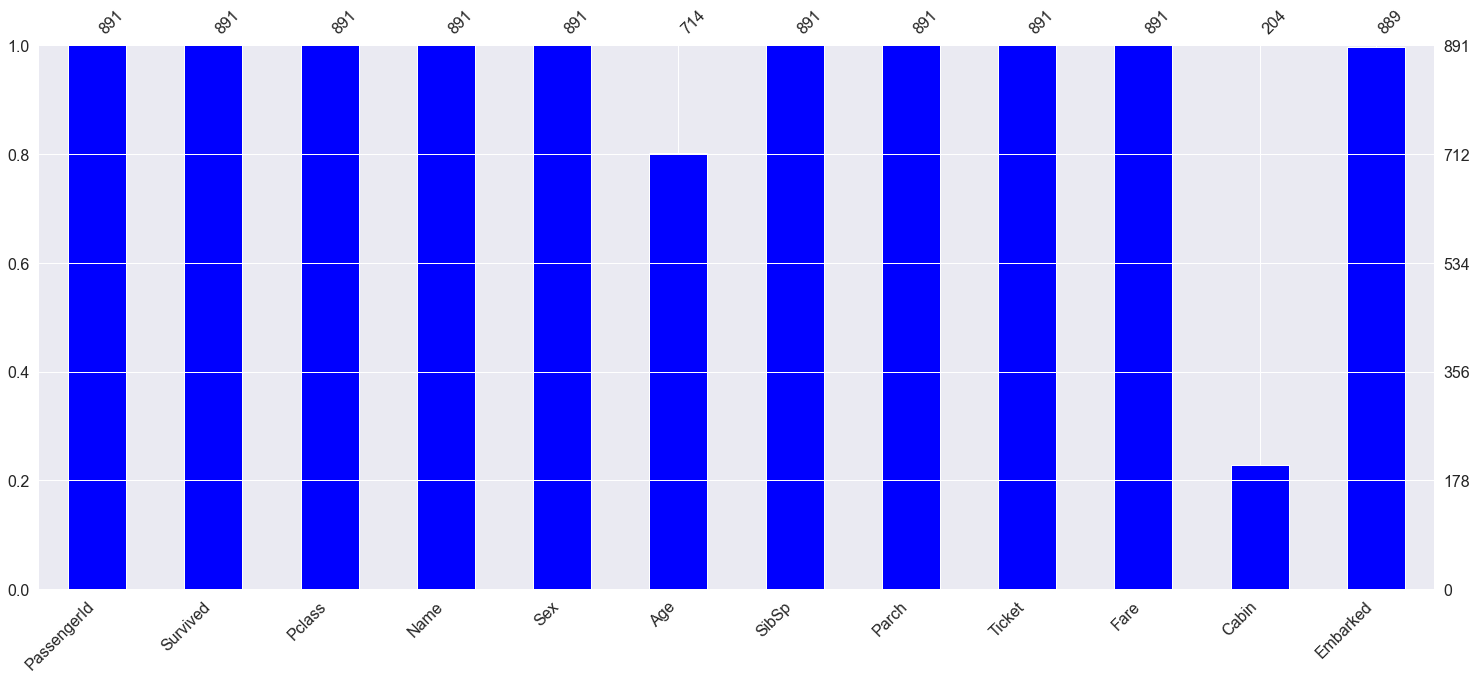

In [20]:
msno.bar(tt,color='blue')

In [21]:
tt.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


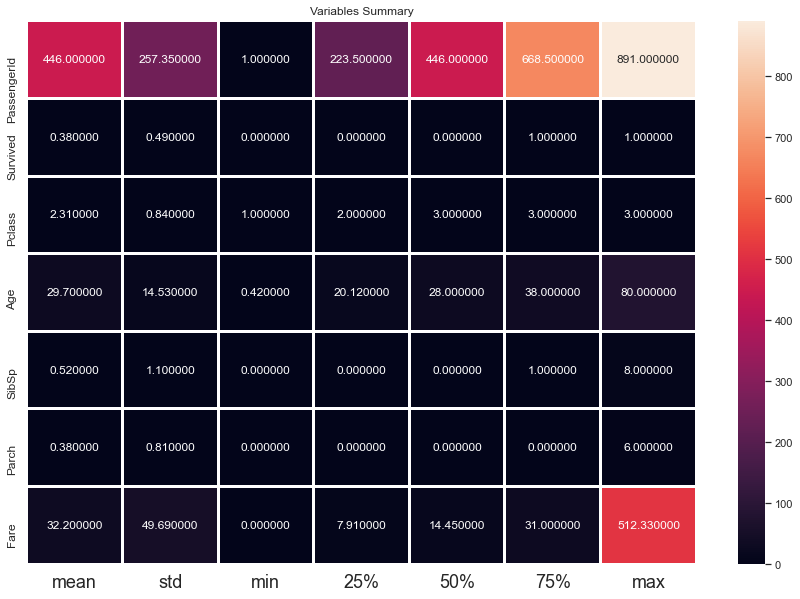

In [22]:
plt.figure(figsize = (15,10))
sns.heatmap(round(tt.describe()[1:].transpose(),2),linewidth = 2,annot= True, fmt = "f")
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 12)
plt.title("Variables Summary")
plt.show()

In [23]:
tt.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


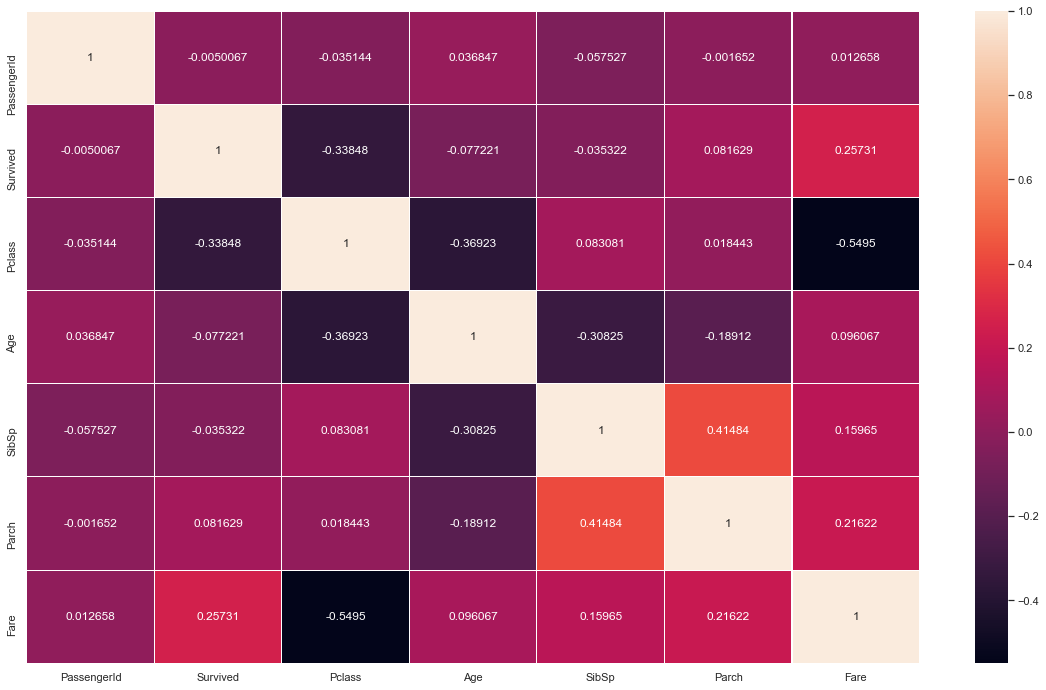

In [24]:
plt.figure(figsize = [20,12])
sns.heatmap(tt.corr(), annot = True,linewidths=0.1,fmt = '.5g' )
plt.show()

In [25]:
tt.duplicated().sum()

0

In [26]:
new_survived = pd.Categorical(tt["Survived"])
new_survived = new_survived.rename_categories(["Died","Survived"])

new_survived.describe()

,counts,freqs
categories,,
Died,549,0.616162
Survived,342,0.383838


<AxesSubplot:xlabel='Survived', ylabel='count'>

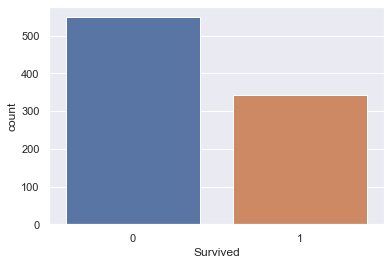

In [27]:
sns.countplot(tt['Survived'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

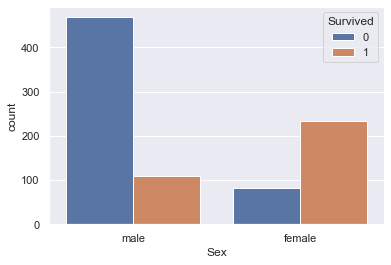

In [28]:
#Bivariate Analysis 
sns.countplot(data = tt, x  = 'Sex', hue = 'Survived')
#Analysing how Sex affected the Survival. 
#In this case clearly females survived more than the males.

<AxesSubplot:xlabel='Age', ylabel='count'>

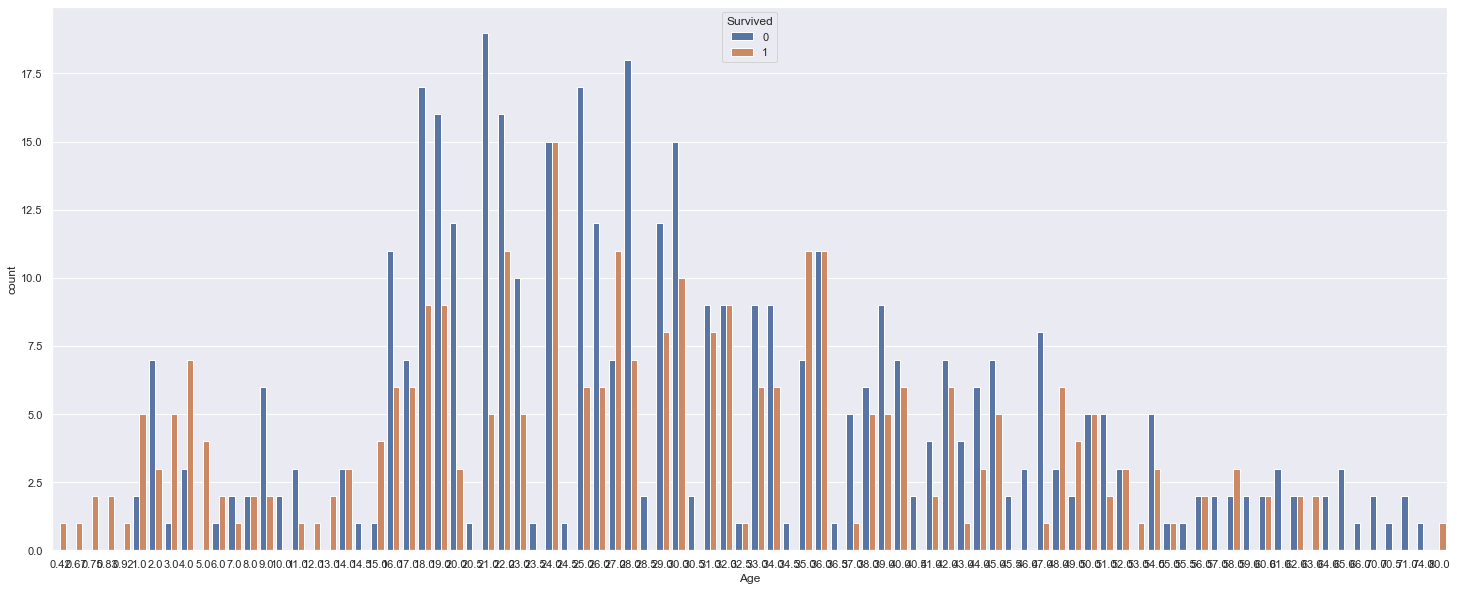

In [29]:
#Bivariate Analysis
plt.figure(figsize =(25,10) )
sns.countplot(data = tt, x  = 'Age', hue = 'Survived')
#Analysing how Age affected the Survival. 
#As the age increased the survival decreased

<AxesSubplot:xlabel='Sex', ylabel='Age'>

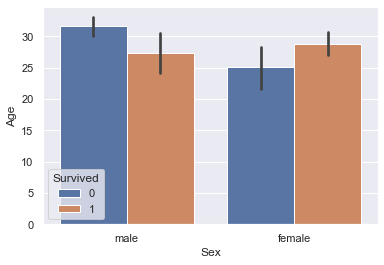

In [30]:
#Bivariate analysis
sns.barplot(data = tt, x = 'Sex', y = 'Age', hue = 'Survived')
#Analysing how both age and sex affected survival

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

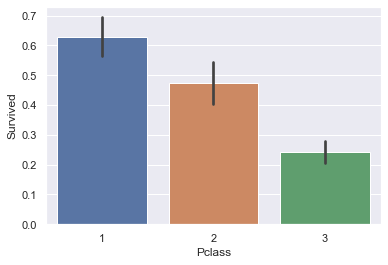

In [31]:
#Bivariate analysis

sns.barplot(data = tt, x = 'Pclass', y = 'Survived')

#people in 1st class survived more than the other two categories.

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

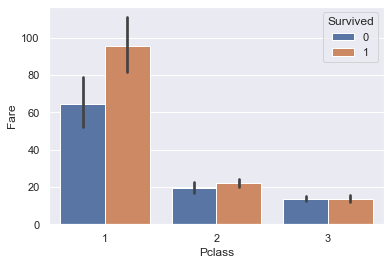

In [32]:
#Bivariate analysis

sns.barplot(data = tt, y = 'Fare', x = 'Pclass', hue = 'Survived' )
#Richer people who payed high fare for Pclass 1 survived almost double the amount of any other category

In [33]:
#Counting the categories and their occurences in Pclass
new_Pclass = pd.Categorical(tt["Pclass"], ordered = True)
new_Pclass = new_Pclass.rename_categories(["Class1","Class2","Class3"])

new_Pclass.describe()

,counts,freqs
categories,,
Class1,216,0.242424
Class2,184,0.206510
Class3,491,0.551066


<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

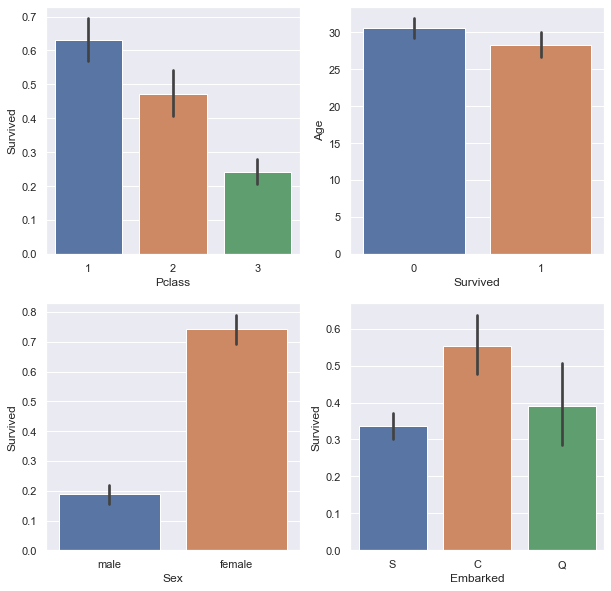

In [34]:
#Multivariate Analysis

fig, axes = plt.subplots(nrows =2,ncols = 2,figsize = (10,10))
sns.barplot(data = tt, x = 'Pclass', y = 'Survived',ax = axes[0][0])
sns.barplot(data = tt, x = 'Survived', y = 'Age',ax= axes[0][1])
sns.barplot(data = tt, x = 'Sex', y = 'Survived',ax = axes[1][0])
sns.barplot(data = tt, x = 'Embarked', y = 'Survived',ax = axes[1][1])


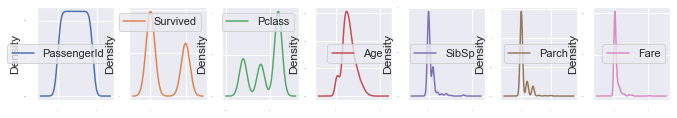

In [35]:
#data distribution (multivariate)
tt.plot(kind='density',subplots=True,layout=(6,11), sharex = False, legend = True, fontsize = 1, figsize=(18,12))
plt.show()

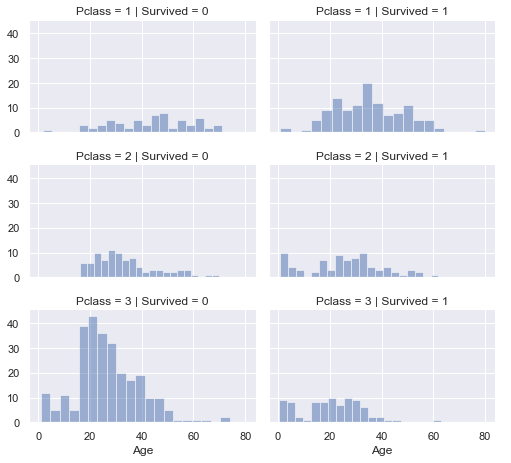

In [36]:
#Mutlivariate Analysis
#Checking distribution of data
grid = sns.FacetGrid(tt, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

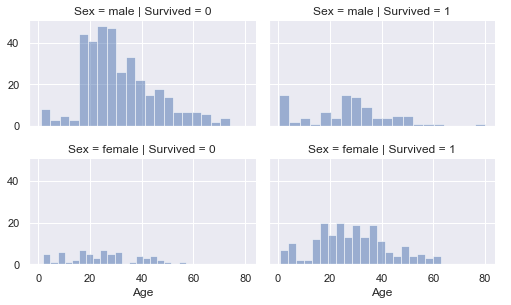

In [37]:
#multivariate Analysis
grid = sns.FacetGrid(tt, col='Survived', row='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

# Data Cleaning

In [38]:
#Checking for null values
tt.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [39]:
#Replacing null Values of Embarked with the most occured value in Embarked
tt['Embarked'] = (tt['Embarked'].isnull()).replace(tt['Embarked'].mode())

In [40]:
#Checking for nulls after treating it
tt['Embarked'].isnull().sum()

0

In [41]:
#Getting mean of Age feature
mean = tt['Age'].mean()

In [42]:
#Getting Standard deviation of Age Feature
std = tt['Age'].std()

In [43]:
#Creating a new age column with randomly generated number with the help of Age column's upper limit as (mean +std) and lower limit as (mean-std)
tt['New age'] = np.random.randint(mean - std, mean + std, tt.shape[0]) 

In [44]:
#filling NaN's of Age column by New Age Column
tt['Age'] = tt['Age'].fillna(tt['New age'])

In [45]:
#Dropping New Age Column
tt.drop('New age', axis = 1, inplace = True)

In [46]:
#Checking for null values
tt.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

# Feature Engineering

In [47]:
tt["Cabin"].unique() #Check unique cabins

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [48]:
#Describing new categories

char_cabin = tt["Cabin"].astype(str) #Convert data into String
new_Cabin = np.array([cabin[0] for cabin in char_cabin]) #Take only first letter
new_Cabin = pd.Categorical(new_Cabin)
new_Cabin.describe()

,counts,freqs
categories,,
A,15,0.016835
B,47,0.052750
C,59,0.066218
D,33,0.037037
E,32,0.035915
F,13,0.014590
G,4,0.004489
T,1,0.001122
n,687,0.771044


In [49]:
#Overwriting previous Cabin Column with the new one.
tt['Cabin'] = new_Cabin

Fare : We've zero values in Fare column which is illogical. every ticket had an amount whether it was bought by an adult for their children. So we can replace zero with the mean.

In [50]:
#Location of where fare is zero
np.where(tt['Fare'] == 0)

(array([179, 263, 271, 277, 302, 413, 466, 481, 597, 633, 674, 732, 806,
        815, 822], dtype=int64),)

In [51]:
#getting mean of Fare
mean = tt['Fare'].mean()
mean

32.2042079685746

In [52]:
#Replacing Zero with the mean
tt['Fare'] = tt['Fare'].replace({0:mean})

In [54]:
#Encoding Sex Column
tt['Sex'] = tt['Sex'].replace({'male': 0, 'female': 1})

In [55]:
#introducing a new Family feature 
tt["Family"] = tt["SibSp"] + tt["Parch"]

In [56]:
#Getting the biggest number of family and their information
most_family = np.where(tt["Family"] == max(tt["Family"]))
tt.iloc[most_family]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
159,160,0,3,"Sage, Master. Thomas Henry",0,15.0,8,2,CA. 2343,69.55,n,False,10
180,181,0,3,"Sage, Miss. Constance Gladys",1,33.0,8,2,CA. 2343,69.55,n,False,10
201,202,0,3,"Sage, Mr. Frederick",0,15.0,8,2,CA. 2343,69.55,n,False,10
324,325,0,3,"Sage, Mr. George John Jr",0,23.0,8,2,CA. 2343,69.55,n,False,10
792,793,0,3,"Sage, Miss. Stella Anna",1,37.0,8,2,CA. 2343,69.55,n,False,10
846,847,0,3,"Sage, Mr. Douglas Bullen",0,40.0,8,2,CA. 2343,69.55,n,False,10
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",1,36.0,8,2,CA. 2343,69.55,n,False,10


Fare : We've zero values in Fare column which is illogical. every ticket had an amount whether it was bought by an adult for their children. So we can replace zero with the mean.

In [57]:
tt.drop(columns = ['PassengerId','Name','Ticket'], inplace = True) #Dropping Nominal Data
tt

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family
0,0,3,0,22.0,1,0,7.2500,n,False,1
1,1,1,1,38.0,1,0,71.2833,C,False,1
2,1,3,1,26.0,0,0,7.9250,n,False,0
3,1,1,1,35.0,1,0,53.1000,C,False,1
4,0,3,0,35.0,0,0,8.0500,n,False,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,n,False,0
887,1,1,1,19.0,0,0,30.0000,B,False,0
888,0,3,1,28.0,1,2,23.4500,n,False,3
889,1,1,0,26.0,0,0,30.0000,C,False,0


Removing skewness

In [58]:
#Checking skewness for quantitative feature
tt['Fare'].skew()

4.811193928335202

<AxesSubplot:xlabel='Fare', ylabel='Density'>

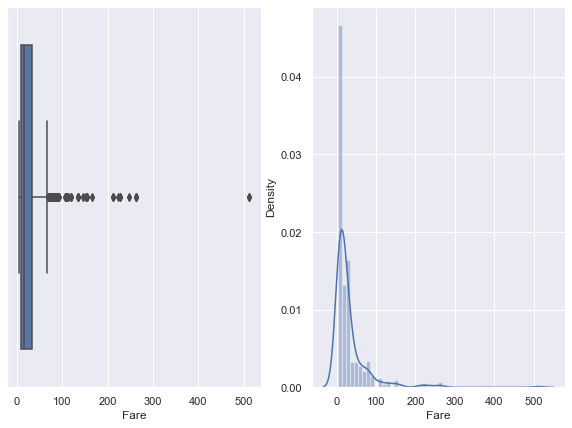

In [59]:
#Visualising outlier and skewness using boxplot and distribution plot
fig, ax = plt.subplots(1,2, figsize = (10,7))
sns.boxplot(tt['Fare'], ax = ax[0])
sns.distplot(tt['Fare'], ax = ax[1])

#we've rightly skewed data

In [60]:
#performing log transformation to remove skewness
tt['Fare'] = np.log(tt['Fare'])

In [61]:
#performing cuberoot transformation to remove skewness

tt['Fare'] = np.cbrt(tt['Fare'])

In [62]:
#Checking skewness after treating it
tt['Fare'].skew()


0.5543066804609175

<AxesSubplot:xlabel='Fare', ylabel='Density'>

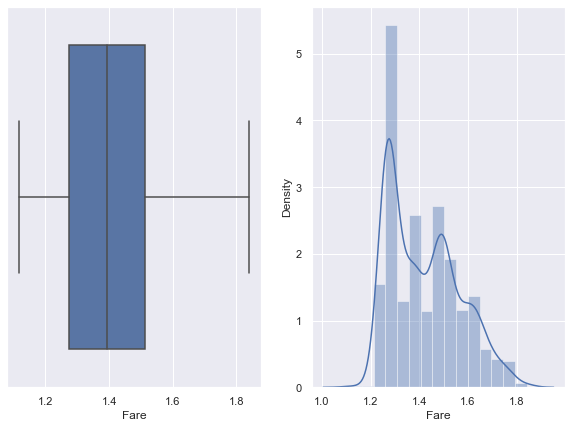

In [63]:
#Visualising data distribution after skewness removal
fig, ax = plt.subplots(1,2,figsize = (10,7))
sns.boxplot(tt['Fare'], ax = ax[0])
sns.distplot(tt['Fare'], ax = ax[1])

In [64]:
#Encoding categorical Data
tt_new = pd.get_dummies(tt)
tt_new

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_n
0,0,3,0,22.0,1,0,1.255919,False,1,0,0,0,0,0,0,0,0,1
1,1,1,1,38.0,1,0,1.621920,False,1,0,0,1,0,0,0,0,0,0
2,1,3,1,26.0,0,0,1.274456,False,0,0,0,0,0,0,0,0,0,1
3,1,1,1,35.0,1,0,1.583712,False,1,0,0,1,0,0,0,0,0,0
4,0,3,0,35.0,0,0,1.277660,False,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,1.368862,False,0,0,0,0,0,0,0,0,0,1
887,1,1,1,19.0,0,0,1.503871,False,0,0,1,0,0,0,0,0,0,0
888,0,3,1,28.0,1,2,1.466652,False,3,0,0,0,0,0,0,0,0,1
889,1,1,0,26.0,0,0,1.503871,False,0,0,0,1,0,0,0,0,0,0


In [65]:
#Splitting Dataset into Target and Features

X = tt_new.drop('Survived', axis = 1)
y = tt_new['Survived']

# Model Building

In [66]:
#Splitting Data in training and testing datesets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

# Logistic Regression

In [67]:
#Finding Random state using LogisticRegression
maxAccu=0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predlr = LR.predict(x_test)
    acc = accuracy_score(y_test,predlr)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu,"on random_state",maxRS)

Best accuracy is 0.8656716417910447 on random_state 6


In [68]:
LR = LogisticRegression(random_state = 6)
LR.fit(X_train,y_train)
predlr = LR.predict(X_test)
acc = accuracy_score(y_test,predlr)
acc


0.582089552238806

In [69]:
# Performing Evaluation metrics for our model
predlr=LR.predict(X_test)
print('Accuracy Score for Logistic Regression is :',round(accuracy_score(y_test,predlr),4)*100,'% \n')
print('Confusion Matrix of Logistic Regression : \n',confusion_matrix(y_test,predlr), '\n')
print('Classification Logistic Regression : \n',classification_report(y_test,predlr))

Accuracy Score for Logistic Regression is : 58.209999999999994 % 

Confusion Matrix of Logistic Regression : 
 [[148  16]
 [ 96   8]] 

Classification Logistic Regression : 
               precision    recall  f1-score   support

           0       0.61      0.90      0.73       164
           1       0.33      0.08      0.12       104

    accuracy                           0.58       268
   macro avg       0.47      0.49      0.43       268
weighted avg       0.50      0.58      0.49       268



array([[148,  16],
       [ 96,   8]], dtype=int64)

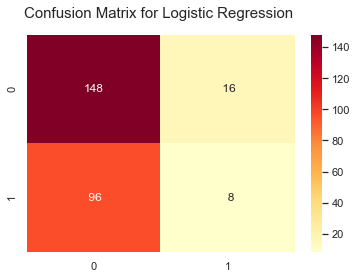

In [70]:
cm = confusion_matrix(y_test,predlr)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test,predlr),annot=True,fmt='3.0f',cmap="YlOrRd")
plt.title('Confusion Matrix for Logistic Regression ', y=1.05, size=15)
cm

# Decision Tree Classifier

In [71]:
#Instantiating Decision Tree model and training it
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [72]:
DT.score(X_test,y_test)


0.503731343283582

In [73]:
# Performing Evaluation metrics for our model
preddt=DT.predict(X_test)
print('Accuracy Score for Decision Treee is :',round(accuracy_score(y_test,preddt),4)*100,'% \n')
print('Confusion Matrix of Decision Tree: \n',confusion_matrix(y_test,preddt), '\n')
print('Classification Decision Tree: \n',classification_report(y_test,preddt))

Accuracy Score for Decision Treee is : 50.370000000000005 % 

Confusion Matrix of Decision Tree: 
 [[90 74]
 [59 45]] 

Classification Decision Tree: 
               precision    recall  f1-score   support

           0       0.60      0.55      0.58       164
           1       0.38      0.43      0.40       104

    accuracy                           0.50       268
   macro avg       0.49      0.49      0.49       268
weighted avg       0.52      0.50      0.51       268



array([[90, 74],
       [59, 45]], dtype=int64)

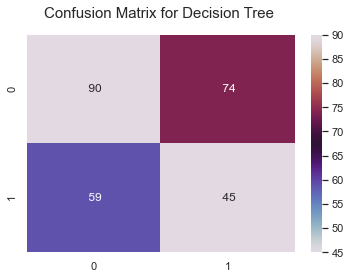

In [74]:
cm = confusion_matrix(y_test,preddt)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test,preddt),annot=True,fmt='3.0f',cmap="twilight")
plt.title('Confusion Matrix for Decision Tree ', y=1.05, size=15)
cm

# K Nearest Neighors Classifier

In [76]:
#Instantiating KnN model and training it
knn = KNeighborsClassifier() 
knn.fit(X_train, y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

In [77]:
acc_knn

70.63

In [78]:
# Performing Evaluation metrics for our model
knnpred=knn.predict(X_test)
print('Accuracy Score for KNN is :',round(accuracy_score(y_test,knnpred),4)*100,'% \n')
print('Confusion Matrix of KNN: \n',confusion_matrix(y_test,knnpred), '\n')
print('Classification KNN: \n',classification_report(y_test,knnpred))

Accuracy Score for KNN is : 52.61 % 

Confusion Matrix of KNN: 
 [[103  61]
 [ 66  38]] 

Classification KNN: 
               precision    recall  f1-score   support

           0       0.61      0.63      0.62       164
           1       0.38      0.37      0.37       104

    accuracy                           0.53       268
   macro avg       0.50      0.50      0.50       268
weighted avg       0.52      0.53      0.52       268



array([[103,  61],
       [ 66,  38]], dtype=int64)

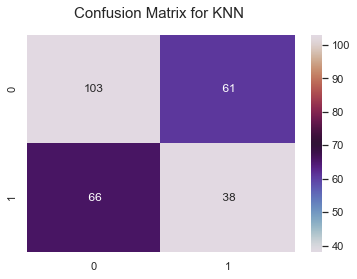

In [79]:
cm = confusion_matrix(y_test,knnpred)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test,knnpred),annot=True,fmt='3.0f',cmap="twilight")
plt.title('Confusion Matrix for KNN ', y=1.05, size=15)
cm

# Random Forest Classifier

In [80]:
#Model instantiating and training it
RF = RandomForestClassifier()
RF.fit(X_train,y_train)

RandomForestClassifier()

In [81]:
RF.score(X_test,y_test)

0.5485074626865671

In [82]:
# Performing Evaluation metrics for our model
predrf=RF.predict(X_test)
print('Accuracy Score for Random Forest Classifier is :',round(accuracy_score(y_test,predrf),4)*100,'% \n')
print('Confusion Matrix of Random Forest Classifier : \n',confusion_matrix(y_test,predrf), '\n')
print('Classification Random Forest Classifier : \n',classification_report(y_test,predrf))

Accuracy Score for Random Forest Classifier is : 54.85 % 

Confusion Matrix of Random Forest Classifier : 
 [[113  51]
 [ 70  34]] 

Classification Random Forest Classifier : 
               precision    recall  f1-score   support

           0       0.62      0.69      0.65       164
           1       0.40      0.33      0.36       104

    accuracy                           0.55       268
   macro avg       0.51      0.51      0.51       268
weighted avg       0.53      0.55      0.54       268



array([[113,  51],
       [ 70,  34]], dtype=int64)

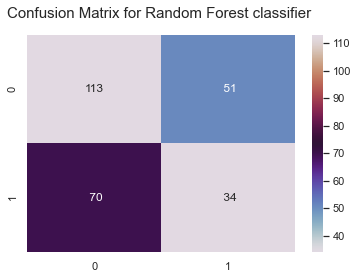

In [83]:
cm = confusion_matrix(y_test,predrf)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test,predrf),annot=True,fmt='3.0f',cmap="twilight")
plt.title('Confusion Matrix for Random Forest classifier ', y=1.05, size=15)
cm

# Support Vector Classifier

In [84]:
#Instantiating SVC model and training it

svc  = SVC()
svc.fit(X_train,y_train)


SVC()

In [85]:
svc.score(X_test,y_test)

0.6119402985074627

In [86]:
# Performing Evaluation metrics for our model
svcpred=svc.predict(X_test)
print('Accuracy Score for SVC is :',round(accuracy_score(y_test,svcpred),4)*100,'% \n')
print('Confusion Matrix of SVC: \n',confusion_matrix(y_test,svcpred), '\n')
print('Classification SVC: \n',classification_report(y_test,svcpred))

Accuracy Score for SVC is : 61.19 % 

Confusion Matrix of SVC: 
 [[164   0]
 [104   0]] 

Classification SVC: 
               precision    recall  f1-score   support

           0       0.61      1.00      0.76       164
           1       0.00      0.00      0.00       104

    accuracy                           0.61       268
   macro avg       0.31      0.50      0.38       268
weighted avg       0.37      0.61      0.46       268



array([[164,   0],
       [104,   0]], dtype=int64)

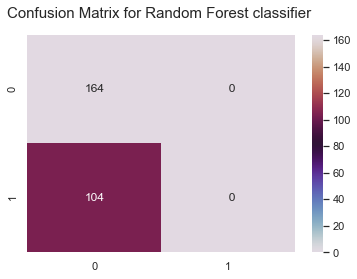

In [87]:
cm = confusion_matrix(y_test,svcpred)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test,svcpred),annot=True,fmt='3.0f',cmap="twilight")
plt.title('Confusion Matrix for Random Forest classifier ', y=1.05, size=15)
cm

In [88]:
#Printing cross_val_scores of all models used so far

CVscore_LR = cross_val_score(LR,X,y, cv = 10)
print("Cross validation of Logistic Regression score is :", round(CVscore_LR.mean(),3)*100,'%')

CVscore_DT = cross_val_score(DT,X,y,cv = 10 )
print("Cross validation score of Decision Tree is :", round(CVscore_DT.mean(),4)*100,'%')

CVscore_Knn = cross_val_score(knn,X,y,cv = 10 )
print("Cross validation score of KNeighbors Classifier :", round(CVscore_Knn.mean(),4)*100,'%')

CVscore_RF = cross_val_score(RF,X,y,cv = 10 )
print("Cross validation score of Random Forest Classifier :", round(CVscore_RF.mean(),4)*100,'%')

CVscore_Svc = cross_val_score(svc,X,y,cv = 10 )
print("Cross validation score Support Vector Classifier is :",round(CVscore_Svc.mean(),4)*100,'%')

Cross validation of Logistic Regression score is : 79.60000000000001 %
Cross validation score of Decision Tree is : 75.76 %
Cross validation score of KNeighbors Classifier : 75.53 %
Cross validation score of Random Forest Classifier : 80.7 %
Cross validation score Support Vector Classifier is : 64.09 %


In [89]:
#Creating a Dataframe to check difference between model accuracy and cross_val_score
data = {'Model Accuracy' : [0.8582,0.5597,0.7689,0.5336,0.6045],
                      'Cross-Val-Score': [0.796,0.7667,0.706,0.810,0.6802]}
                      
Model = pd.DataFrame(data,index = ['Logistic Regression','Decision Tree','KNN','Random Forest Classifier','SVC'])
Model['ModelAcc - CVScore'] = Model['Model Accuracy'] - Model['Cross-Val-Score']
Model

,Model Accuracy,Cross-Val-Score,ModelAcc - CVScore
Logistic Regression,0.8582,0.7960,0.0622
Decision Tree,0.5597,0.7667,-0.2070
KNN,0.7689,0.7060,0.0629
Random Forest Classifier,0.5336,0.8100,-0.2764
SVC,0.6045,0.6802,-0.0757


# Hyerparameter tuning of Models

In [90]:
grid = {"criterion" : ['gini','entropy'],
       "splitter" : ['best','random'],
       "max_depth" : [3,4,5,6,7,8,9,10,None],
       "max_features" : ["auto","log2","sqrt"],
       "min_samples_split" : [2,3,4,5,6],
       "min_samples_leaf": [4,6,8,10,12]}

In [91]:
gs = GridSearchCV(estimator = DT, param_grid = grid, cv = 5, verbose = 3 )

In [92]:
gs.fit(X_train,y_train)

Fitting 5 folds for each of 2700 candidates, totalling 13500 fits
[CV 1/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.624 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.656 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.632 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.621 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.565 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.624 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth

[CV 3/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=5, splitter=random;, score=0.608 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=5, splitter=random;, score=0.597 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=5, splitter=random;, score=0.621 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=6, splitter=best;, score=0.592 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=6, splitter=best;, score=0.600 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=6, splitter=best;, score=0.616 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=6

[CV 4/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=10, min_samples_split=5, splitter=best;, score=0.605 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=10, min_samples_split=5, splitter=best;, score=0.492 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=10, min_samples_split=5, splitter=random;, score=0.616 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=10, min_samples_split=5, splitter=random;, score=0.616 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=10, min_samples_split=5, splitter=random;, score=0.616 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=10, min_samples_split=5, splitter=random;, score=0.629 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=10, min_sample

[CV 1/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.616 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.584 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.632 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.621 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.613 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.616 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, sp

[CV 4/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=5, splitter=best;, score=0.605 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=5, splitter=best;, score=0.484 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=5, splitter=random;, score=0.616 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=5, splitter=random;, score=0.624 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=5, splitter=random;, score=0.584 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=5, splitter=random;, score=0.621 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split

[CV 5/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=12, min_samples_split=3, splitter=random;, score=0.621 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=12, min_samples_split=4, splitter=best;, score=0.616 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=12, min_samples_split=4, splitter=best;, score=0.576 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=12, min_samples_split=4, splitter=best;, score=0.616 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=12, min_samples_split=4, splitter=best;, score=0.605 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=12, min_samples_split=4, splitter=best;, score=0.532 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=12, min_samples_spli

[CV 5/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.565 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.616 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.616 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.584 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.629 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.621 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_spl

[CV 5/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, splitter=random;, score=0.621 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, splitter=best;, score=0.632 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, splitter=best;, score=0.576 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, splitter=best;, score=0.600 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, splitter=best;, score=0.613 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, splitter=best;, score=0.492 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, sp

[CV 5/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, splitter=best;, score=0.548 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, splitter=random;, score=0.608 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, splitter=random;, score=0.616 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, splitter=random;, score=0.616 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, splitter=random;, score=0.629 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, splitter=random;, score=0.540 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=10, min_samp

[CV 2/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.616 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.592 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.621 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.581 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.608 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.584 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split

[CV 2/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=8, min_samples_split=5, splitter=best;, score=0.616 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=8, min_samples_split=5, splitter=best;, score=0.584 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=8, min_samples_split=5, splitter=best;, score=0.605 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=8, min_samples_split=5, splitter=best;, score=0.460 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=8, min_samples_split=5, splitter=random;, score=0.608 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=8, min_samples_split=5, splitter=random;, score=0.632 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=8, min_samples_split=5, 

[CV 4/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=12, min_samples_split=4, splitter=random;, score=0.629 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=12, min_samples_split=4, splitter=random;, score=0.581 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=12, min_samples_split=5, splitter=best;, score=0.632 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=12, min_samples_split=5, splitter=best;, score=0.616 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=12, min_samples_split=5, splitter=best;, score=0.624 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=12, min_samples_split=5, splitter=best;, score=0.645 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=12, min_samples_sp

[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=4, splitter=best;, score=0.576 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=4, splitter=best;, score=0.624 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=4, splitter=best;, score=0.613 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=4, splitter=best;, score=0.476 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=4, splitter=random;, score=0.616 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=4, splitter=random;, score=0.616 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=4, 

[CV 3/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=10, min_samples_split=4, splitter=best;, score=0.584 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=10, min_samples_split=4, splitter=best;, score=0.605 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=10, min_samples_split=4, splitter=best;, score=0.556 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=10, min_samples_split=4, splitter=random;, score=0.640 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=10, min_samples_split=4, splitter=random;, score=0.616 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=10, min_samples_split=4, splitter=random;, score=0.608 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=10, min_samples_

[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.597 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.492 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.608 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.616 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.600 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.637 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split

[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, splitter=best;, score=0.592 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, splitter=best;, score=0.613 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, splitter=best;, score=0.540 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, splitter=random;, score=0.616 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, splitter=random;, score=0.632 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, splitter=random;, score=0.592 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=4

[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=12, min_samples_split=4, splitter=best;, score=0.584 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=12, min_samples_split=4, splitter=best;, score=0.552 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=12, min_samples_split=4, splitter=best;, score=0.629 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=12, min_samples_split=4, splitter=best;, score=0.548 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=12, min_samples_split=4, splitter=random;, score=0.584 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=12, min_samples_split=4, splitter=random;, score=0.616 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=12, min_samples_sp

[CV 3/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=4, splitter=best;, score=0.576 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=4, splitter=best;, score=0.629 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=4, splitter=best;, score=0.508 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=4, splitter=random;, score=0.616 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=4, splitter=random;, score=0.616 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=4, splitter=random;, score=0.536 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=4

[CV 4/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=4, splitter=best;, score=0.669 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=4, splitter=best;, score=0.556 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=4, splitter=random;, score=0.608 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=4, splitter=random;, score=0.632 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=4, splitter=random;, score=0.616 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=4, splitter=random;, score=0.629 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=10, min_sample

[CV 4/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.605 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.589 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.624 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.600 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.584 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.597 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split

[CV 3/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=8, min_samples_split=3, splitter=random;, score=0.608 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=8, min_samples_split=3, splitter=random;, score=0.629 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=8, min_samples_split=3, splitter=random;, score=0.573 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=8, min_samples_split=4, splitter=best;, score=0.592 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=8, min_samples_split=4, splitter=best;, score=0.624 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=8, min_samples_split=4, splitter=best;, score=0.568 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=8, min_samples_split=4

[CV 1/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=12, min_samples_split=2, splitter=random;, score=0.616 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=12, min_samples_split=2, splitter=random;, score=0.592 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=12, min_samples_split=2, splitter=random;, score=0.616 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=12, min_samples_split=2, splitter=random;, score=0.605 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=12, min_samples_split=2, splitter=random;, score=0.605 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=12, min_samples_split=3, splitter=best;, score=0.616 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=12, min_samp

[CV 2/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, splitter=random;, score=0.640 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, splitter=random;, score=0.616 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, splitter=random;, score=0.621 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, splitter=random;, score=0.573 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=3, splitter=best;, score=0.632 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=3, splitter=best;, score=0.560 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split

[CV 3/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, splitter=random;, score=0.600 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, splitter=random;, score=0.629 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, splitter=random;, score=0.613 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=3, splitter=best;, score=0.616 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=3, splitter=best;, score=0.560 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=3, splitter=best;, score=0.624 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_

[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.605 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.508 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.608 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.624 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.552 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.613 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=3, 

[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=2, splitter=best;, score=0.508 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=2, splitter=random;, score=0.640 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=2, splitter=random;, score=0.648 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=2, splitter=random;, score=0.624 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=2, splitter=random;, score=0.621 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=2, splitter=random;, score=0.556 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_spl

[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=10, min_samples_split=6, splitter=best;, score=0.597 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=10, min_samples_split=6, splitter=best;, score=0.524 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=10, min_samples_split=6, splitter=random;, score=0.648 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=10, min_samples_split=6, splitter=random;, score=0.600 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=10, min_samples_split=6, splitter=random;, score=0.616 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=10, min_samples_split=6, splitter=random;, score=0.621 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=10, min_sample

[CV 3/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.592 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.637 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.540 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.576 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.624 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.552 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=6

[CV 4/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=5, splitter=best;, score=0.613 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=5, splitter=best;, score=0.540 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=5, splitter=random;, score=0.608 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=5, splitter=random;, score=0.576 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=5, splitter=random;, score=0.568 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=5, splitter=random;, score=0.621 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split

[CV 1/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=12, min_samples_split=4, splitter=random;, score=0.608 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=12, min_samples_split=4, splitter=random;, score=0.616 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=12, min_samples_split=4, splitter=random;, score=0.600 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=12, min_samples_split=4, splitter=random;, score=0.613 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=12, min_samples_split=4, splitter=random;, score=0.621 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=12, min_samples_split=5, splitter=best;, score=0.624 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=12, min_samp

[CV 4/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=6, min_samples_split=3, splitter=random;, score=0.629 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=6, min_samples_split=3, splitter=random;, score=0.500 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, splitter=best;, score=0.608 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, splitter=best;, score=0.592 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, splitter=best;, score=0.608 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, splitter=best;, score=0.589 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, 

[CV 5/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=10, min_samples_split=3, splitter=best;, score=0.573 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=10, min_samples_split=3, splitter=random;, score=0.616 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=10, min_samples_split=3, splitter=random;, score=0.600 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=10, min_samples_split=3, splitter=random;, score=0.576 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=10, min_samples_split=3, splitter=random;, score=0.629 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=10, min_samples_split=3, splitter=random;, score=0.589 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=10, min_samp

[CV 1/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.600 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.600 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.552 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.605 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.492 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.632 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=3, sp

[CV 4/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=8, min_samples_split=2, splitter=best;, score=0.637 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=8, min_samples_split=2, splitter=best;, score=0.516 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=8, min_samples_split=2, splitter=random;, score=0.592 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=8, min_samples_split=2, splitter=random;, score=0.616 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=8, min_samples_split=2, splitter=random;, score=0.608 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=8, min_samples_split=2, splitter=random;, score=0.581 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=8, min_samples_split

[CV 1/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=12, min_samples_split=2, splitter=best;, score=0.616 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=12, min_samples_split=2, splitter=best;, score=0.584 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=12, min_samples_split=2, splitter=best;, score=0.616 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=12, min_samples_split=2, splitter=best;, score=0.629 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=12, min_samples_split=2, splitter=best;, score=0.516 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=12, min_samples_split=2, splitter=random;, score=0.616 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=12, min_samples_spli

[CV 2/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=6, min_samples_split=2, splitter=random;, score=0.624 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=6, min_samples_split=2, splitter=random;, score=0.600 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=6, min_samples_split=2, splitter=random;, score=0.637 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=6, min_samples_split=2, splitter=random;, score=0.589 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=6, min_samples_split=3, splitter=best;, score=0.608 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=6, min_samples_split=3, splitter=best;, score=0.528 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=6, min_samples_split

[CV 4/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=8, min_samples_split=6, splitter=best;, score=0.540 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=8, min_samples_split=6, splitter=best;, score=0.500 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=8, min_samples_split=6, splitter=random;, score=0.608 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=8, min_samples_split=6, splitter=random;, score=0.600 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=8, min_samples_split=6, splitter=random;, score=0.608 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=8, min_samples_split=6, splitter=random;, score=0.621 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=8, min_samples_split

[CV 1/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=12, min_samples_split=4, splitter=best;, score=0.592 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=12, min_samples_split=4, splitter=best;, score=0.568 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=12, min_samples_split=4, splitter=best;, score=0.584 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=12, min_samples_split=4, splitter=best;, score=0.629 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=12, min_samples_split=4, splitter=best;, score=0.581 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=12, min_samples_split=4, splitter=random;, score=0.616 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=12, min_samples_spli

[CV 2/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, splitter=best;, score=0.560 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, splitter=best;, score=0.568 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, splitter=best;, score=0.581 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, splitter=best;, score=0.556 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, splitter=random;, score=0.632 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, splitter=random;, score=0.576 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, 

[CV 1/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, splitter=best;, score=0.640 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, splitter=best;, score=0.584 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, splitter=best;, score=0.600 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, splitter=best;, score=0.669 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, splitter=best;, score=0.556 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, splitter=random;, score=0.640 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=10, min_samples_spli

[CV 1/5] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.552 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.568 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.512 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.605 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.452 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.624 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=2, sp

[CV 1/5] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=8, min_samples_split=2, splitter=best;, score=0.664 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=8, min_samples_split=2, splitter=best;, score=0.600 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=8, min_samples_split=2, splitter=best;, score=0.584 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=8, min_samples_split=2, splitter=best;, score=0.597 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=8, min_samples_split=2, splitter=best;, score=0.500 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=8, min_samples_split=2, splitter=random;, score=0.616 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=8, min_samples_split=2, sp

[CV 1/5] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=12, min_samples_split=2, splitter=random;, score=0.656 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=12, min_samples_split=2, splitter=random;, score=0.600 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=12, min_samples_split=2, splitter=random;, score=0.600 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=12, min_samples_split=2, splitter=random;, score=0.613 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=12, min_samples_split=2, splitter=random;, score=0.581 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=12, min_samples_split=3, splitter=best;, score=0.576 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=12, min_samp

[CV 4/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=6, min_samples_split=2, splitter=best;, score=0.629 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=6, min_samples_split=2, splitter=best;, score=0.500 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=6, min_samples_split=2, splitter=random;, score=0.600 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=6, min_samples_split=2, splitter=random;, score=0.600 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=6, min_samples_split=2, splitter=random;, score=0.568 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=6, min_samples_split=2, splitter=random;, score=0.621 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=6, min_samples_split

[CV 1/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=10, min_samples_split=3, splitter=best;, score=0.616 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=10, min_samples_split=3, splitter=best;, score=0.632 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=10, min_samples_split=3, splitter=best;, score=0.584 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=10, min_samples_split=3, splitter=best;, score=0.661 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=10, min_samples_split=3, splitter=best;, score=0.565 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=10, min_samples_split=3, splitter=random;, score=0.608 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=10, min_samples_spli

[CV 4/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.589 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.484 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.616 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.584 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.616 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.605 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split

[CV 4/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, splitter=random;, score=0.621 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, splitter=random;, score=0.556 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=6, min_samples_split=3, splitter=best;, score=0.624 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=6, min_samples_split=3, splitter=best;, score=0.608 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=6, min_samples_split=3, splitter=best;, score=0.584 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=6, min_samples_split=3, splitter=best;, score=0.597 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=6, min_samples_split=3, 

[CV 3/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, splitter=best;, score=0.528 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, splitter=best;, score=0.605 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, splitter=best;, score=0.532 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, splitter=random;, score=0.640 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, splitter=random;, score=0.640 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, splitter=random;, score=0.600 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_

[CV 1/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=12, min_samples_split=6, splitter=random;, score=0.616 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=12, min_samples_split=6, splitter=random;, score=0.616 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=12, min_samples_split=6, splitter=random;, score=0.608 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=12, min_samples_split=6, splitter=random;, score=0.621 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=12, min_samples_split=6, splitter=random;, score=0.613 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.592 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=4, min_sample

[CV 2/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=6, min_samples_split=6, splitter=best;, score=0.544 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=6, min_samples_split=6, splitter=best;, score=0.536 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=6, min_samples_split=6, splitter=best;, score=0.613 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=6, min_samples_split=6, splitter=best;, score=0.516 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=6, min_samples_split=6, splitter=random;, score=0.624 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=6, min_samples_split=6, splitter=random;, score=0.616 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=6, min_samples_split=6, 

[CV 4/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=10, min_samples_split=5, splitter=random;, score=0.629 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=10, min_samples_split=5, splitter=random;, score=0.581 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=10, min_samples_split=6, splitter=best;, score=0.608 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=10, min_samples_split=6, splitter=best;, score=0.560 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=10, min_samples_split=6, splitter=best;, score=0.528 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=10, min_samples_split=6, splitter=best;, score=0.589 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=10, min_samples_sp

[CV 1/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.616 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.544 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.544 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.597 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.500 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.592 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=6, sp

[CV 4/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=8, min_samples_split=6, splitter=best;, score=0.581 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=8, min_samples_split=6, splitter=best;, score=0.444 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=8, min_samples_split=6, splitter=random;, score=0.616 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=8, min_samples_split=6, splitter=random;, score=0.608 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=8, min_samples_split=6, splitter=random;, score=0.544 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=8, min_samples_split=6, splitter=random;, score=0.621 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=8, min_samples_split

[CV 5/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=12, min_samples_split=4, splitter=random;, score=0.581 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=12, min_samples_split=5, splitter=best;, score=0.592 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=12, min_samples_split=5, splitter=best;, score=0.552 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=12, min_samples_split=5, splitter=best;, score=0.552 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=12, min_samples_split=5, splitter=best;, score=0.597 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=12, min_samples_split=5, splitter=best;, score=0.492 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=12, min_samples_spli

[CV 5/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, splitter=best;, score=0.516 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, splitter=random;, score=0.632 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, splitter=random;, score=0.608 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, splitter=random;, score=0.616 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, splitter=random;, score=0.589 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, splitter=random;, score=0.548 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=6, min_samples_spl

[CV 5/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=10, min_samples_split=3, splitter=best;, score=0.556 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=10, min_samples_split=3, splitter=random;, score=0.616 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=10, min_samples_split=3, splitter=random;, score=0.608 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=10, min_samples_split=3, splitter=random;, score=0.608 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=10, min_samples_split=3, splitter=random;, score=0.645 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=10, min_samples_split=3, splitter=random;, score=0.605 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=10, min_samp

[CV 3/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=12, min_samples_split=6, splitter=best;, score=0.600 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=12, min_samples_split=6, splitter=best;, score=0.621 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=12, min_samples_split=6, splitter=best;, score=0.516 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=12, min_samples_split=6, splitter=random;, score=0.616 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=12, min_samples_split=6, splitter=random;, score=0.616 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=12, min_samples_split=6, splitter=random;, score=0.640 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=12, min_samples_

[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=3, splitter=random;, score=0.605 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=3, splitter=random;, score=0.540 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=4, splitter=best;, score=0.624 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=4, splitter=best;, score=0.576 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=4, splitter=best;, score=0.584 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=4, splitter=best;, score=0.645 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_sp

[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=4, splitter=best;, score=0.544 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=4, splitter=best;, score=0.496 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=4, splitter=best;, score=0.552 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=4, splitter=best;, score=0.573 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=4, splitter=best;, score=0.500 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=4, splitter=random;, score=0.616 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=10, min_sampl

[CV 3/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.592 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.637 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.548 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.600 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.552 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.576 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_

[CV 4/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=4, splitter=best;, score=0.637 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=4, splitter=best;, score=0.516 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=4, splitter=random;, score=0.632 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=4, splitter=random;, score=0.632 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=4, splitter=random;, score=0.592 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=4, splitter=random;, score=0.621 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=8, min_sample

[CV 1/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=12, min_samples_split=5, splitter=best;, score=0.592 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=12, min_samples_split=5, splitter=best;, score=0.592 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=12, min_samples_split=5, splitter=best;, score=0.568 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=12, min_samples_split=5, splitter=best;, score=0.621 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=12, min_samples_split=5, splitter=best;, score=0.540 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=12, min_samples_split=5, splitter=random;, score=0.608 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=12, min_sampl

[CV 1/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, splitter=random;, score=0.648 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, splitter=random;, score=0.600 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, splitter=random;, score=0.552 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, splitter=random;, score=0.621 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, splitter=random;, score=0.548 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, splitter=best;, score=0.648 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samp

[CV 2/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, splitter=random;, score=0.616 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, splitter=random;, score=0.592 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, splitter=random;, score=0.621 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, splitter=random;, score=0.500 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, splitter=best;, score=0.608 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, splitter=best;, score=0.592 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=10, min

[CV 2/5] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.544 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.568 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.661 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.540 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.632 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.584 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, 

[CV 4/5] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=8, min_samples_split=5, splitter=best;, score=0.597 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=8, min_samples_split=5, splitter=best;, score=0.508 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=8, min_samples_split=5, splitter=random;, score=0.600 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=8, min_samples_split=5, splitter=random;, score=0.608 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=8, min_samples_split=5, splitter=random;, score=0.560 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=8, min_samples_split=5, splitter=random;, score=0.621 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf

[CV 3/5] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=5, splitter=random;, score=0.600 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=5, splitter=random;, score=0.629 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=5, splitter=random;, score=0.621 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=6, splitter=best;, score=0.592 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=6, splitter=best;, score=0.520 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=6, splitter=best;, score=0.520 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=None, max_features=auto, min_samples_

[CV 5/5] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=12, min_samples_split=6, splitter=best;, score=0.500 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=12, min_samples_split=6, splitter=random;, score=0.600 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=12, min_samples_split=6, splitter=random;, score=0.592 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=12, min_samples_split=6, splitter=random;, score=0.608 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=12, min_samples_split=6, splitter=random;, score=0.621 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=12, min_samples_split=6, splitter=random;, score=0.476 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=None, max_features=log2, min_samp

[CV 2/5] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=6, min_samples_split=2, splitter=best;, score=0.568 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=6, min_samples_split=2, splitter=best;, score=0.536 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=6, min_samples_split=2, splitter=best;, score=0.645 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=6, min_samples_split=2, splitter=best;, score=0.548 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=6, min_samples_split=2, splitter=random;, score=0.632 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=6, min_samples_split=2, splitter=random;, score=0.584 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=6, 

[CV 4/5] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=8, min_samples_split=2, splitter=random;, score=0.653 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=8, min_samples_split=2, splitter=random;, score=0.573 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=8, min_samples_split=3, splitter=best;, score=0.568 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=8, min_samples_split=3, splitter=best;, score=0.512 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=8, min_samples_split=3, splitter=best;, score=0.584 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=8, min_samples_split=3, splitter=best;, score=0.565 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=8, 

[CV 3/5] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=10, min_samples_split=3, splitter=best;, score=0.536 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=10, min_samples_split=3, splitter=best;, score=0.597 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=10, min_samples_split=3, splitter=best;, score=0.532 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=10, min_samples_split=3, splitter=random;, score=0.640 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=10, min_samples_split=3, splitter=random;, score=0.576 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=10, min_samples_split=3, splitter=random;, score=0.624 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=None, max_features=log2, min_samples_

[CV 4/5] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.621 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.573 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.640 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.520 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.536 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.621 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, 

[CV 4/5] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, splitter=best;, score=0.629 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, splitter=best;, score=0.556 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, splitter=random;, score=0.616 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, splitter=random;, score=0.608 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, splitter=random;, score=0.584 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, splitter=random;, score=0.645 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf

[CV 1/5] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=12, min_samples_split=3, splitter=random;, score=0.616 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=12, min_samples_split=3, splitter=random;, score=0.624 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=12, min_samples_split=3, splitter=random;, score=0.592 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=12, min_samples_split=3, splitter=random;, score=0.629 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=12, min_samples_split=3, splitter=random;, score=0.540 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=12, min_samples_split=4, splitter=best;, score=0.640 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=None, max_features=sqrt, min_samp

[CV 3/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.608 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.581 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.581 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.624 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.600 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.576 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=4

[CV 1/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=5, splitter=best;, score=0.624 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=5, splitter=best;, score=0.616 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=5, splitter=best;, score=0.608 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=5, splitter=best;, score=0.621 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=5, splitter=best;, score=0.492 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=5, splitter=random;, score=0.640 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=8, mi

[CV 5/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=10, min_samples_split=5, splitter=random;, score=0.589 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=10, min_samples_split=6, splitter=best;, score=0.608 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=10, min_samples_split=6, splitter=best;, score=0.600 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=10, min_samples_split=6, splitter=best;, score=0.592 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=10, min_samples_split=6, splitter=best;, score=0.621 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=10, min_samples_split=6, splitter=best;, score=0.597 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf

[CV 4/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=12, min_samples_split=6, splitter=best;, score=0.621 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=12, min_samples_split=6, splitter=best;, score=0.573 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=12, min_samples_split=6, splitter=random;, score=0.640 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=12, min_samples_split=6, splitter=random;, score=0.592 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=12, min_samples_split=6, splitter=random;, score=0.608 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=12, min_samples_split=6, splitter=random;, score=0.629 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=auto, min_sample

[CV 4/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=6, min_samples_split=5, splitter=random;, score=0.629 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=6, min_samples_split=5, splitter=random;, score=0.597 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=6, min_samples_split=6, splitter=best;, score=0.624 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=6, min_samples_split=6, splitter=best;, score=0.616 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=6, min_samples_split=6, splitter=best;, score=0.536 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=6, min_samples_split=6, splitter=best;, score=0.613 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=6, 

[CV 5/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=10, min_samples_split=4, splitter=best;, score=0.565 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=10, min_samples_split=4, splitter=random;, score=0.624 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=10, min_samples_split=4, splitter=random;, score=0.608 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=10, min_samples_split=4, splitter=random;, score=0.608 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=10, min_samples_split=4, splitter=random;, score=0.621 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=10, min_samples_split=4, splitter=random;, score=0.589 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=log2, min_samp

[CV 4/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.629 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.605 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.616 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.640 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.632 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.613 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=4, 

[CV 5/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, splitter=best;, score=0.573 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, splitter=random;, score=0.616 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, splitter=random;, score=0.616 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, splitter=random;, score=0.608 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, splitter=random;, score=0.621 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, splitter=random;, score=0.621 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_le

[CV 4/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, splitter=random;, score=0.621 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, splitter=random;, score=0.589 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, splitter=best;, score=0.624 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, splitter=best;, score=0.600 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, splitter=best;, score=0.608 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, splitter=best;, score=0.621 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_le

[CV 4/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.629 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.573 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.624 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.616 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.608 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.645 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, 

[CV 5/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=8, min_samples_split=5, splitter=best;, score=0.565 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=8, min_samples_split=5, splitter=random;, score=0.616 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=8, min_samples_split=5, splitter=random;, score=0.616 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=8, min_samples_split=5, splitter=random;, score=0.608 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=8, min_samples_split=5, splitter=random;, score=0.621 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=8, min_samples_split=5, splitter=random;, score=0.581 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_le

[CV 4/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=12, min_samples_split=4, splitter=random;, score=0.621 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=12, min_samples_split=4, splitter=random;, score=0.548 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=12, min_samples_split=5, splitter=best;, score=0.608 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=12, min_samples_split=5, splitter=best;, score=0.576 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=12, min_samples_split=5, splitter=best;, score=0.608 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=12, min_samples_split=5, splitter=best;, score=0.605 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_le

[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=4, splitter=best;, score=0.608 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=4, splitter=best;, score=0.592 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=4, splitter=best;, score=0.621 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=4, splitter=best;, score=0.532 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=4, splitter=random;, score=0.632 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=4, splitter=random;, score=0.600 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=6, 

[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=10, min_samples_split=3, splitter=random;, score=0.616 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=10, min_samples_split=3, splitter=random;, score=0.624 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=10, min_samples_split=3, splitter=random;, score=0.621 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=10, min_samples_split=3, splitter=random;, score=0.573 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=10, min_samples_split=4, splitter=best;, score=0.640 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=10, min_samples_split=4, splitter=best;, score=0.608 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, min_sample

[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.637 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.621 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.600 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.616 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.600 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.605 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, 

[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, splitter=random;, score=0.584 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, splitter=random;, score=0.621 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, splitter=random;, score=0.556 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, splitter=best;, score=0.592 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, splitter=best;, score=0.624 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, splitter=best;, score=0.600 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=8

[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=12, min_samples_split=2, splitter=random;, score=0.632 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=12, min_samples_split=2, splitter=random;, score=0.608 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=12, min_samples_split=2, splitter=random;, score=0.600 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=12, min_samples_split=2, splitter=random;, score=0.629 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=12, min_samples_split=2, splitter=random;, score=0.613 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=12, min_samples_split=3, splitter=best;, score=0.600 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samp

[CV 5/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.597 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.624 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.608 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.608 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.629 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.589 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_le

[CV 5/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=5, splitter=random;, score=0.556 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=6, splitter=best;, score=0.600 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=6, splitter=best;, score=0.600 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=6, splitter=best;, score=0.640 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=6, splitter=best;, score=0.581 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=6, splitter=best;, score=0.565 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=8, mi

[CV 1/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=12, min_samples_split=5, splitter=random;, score=0.624 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=12, min_samples_split=5, splitter=random;, score=0.576 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=12, min_samples_split=5, splitter=random;, score=0.624 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=12, min_samples_split=5, splitter=random;, score=0.629 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=12, min_samples_split=5, splitter=random;, score=0.589 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=12, min_samples_split=6, splitter=best;, score=0.584 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=auto, min_samp

[CV 5/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=4, splitter=random;, score=0.524 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=5, splitter=best;, score=0.608 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=5, splitter=best;, score=0.560 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=5, splitter=best;, score=0.488 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=5, splitter=best;, score=0.605 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=5, splitter=best;, score=0.532 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=6, mi

[CV 4/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=4, splitter=best;, score=0.653 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=4, splitter=best;, score=0.613 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=4, splitter=random;, score=0.608 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=4, splitter=random;, score=0.616 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=4, splitter=random;, score=0.560 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=4, splitter=random;, score=0.613 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=log2, min_sample

[CV 3/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.600 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.605 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.556 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.624 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.592 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.616 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4

[CV 2/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=3, splitter=random;, score=0.600 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=3, splitter=random;, score=0.592 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=3, splitter=random;, score=0.629 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=3, splitter=random;, score=0.573 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, splitter=best;, score=0.576 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, splitter=best;, score=0.648 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf

[CV 5/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=3, splitter=best;, score=0.573 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=3, splitter=random;, score=0.616 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=3, splitter=random;, score=0.608 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=3, splitter=random;, score=0.608 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=3, splitter=random;, score=0.605 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=3, splitter=random;, score=0.532 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samp

[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.592 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.536 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.629 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.508 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.608 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.584 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, 

[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=2, splitter=best;, score=0.645 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=2, splitter=best;, score=0.605 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=2, splitter=random;, score=0.624 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=2, splitter=random;, score=0.616 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=2, splitter=random;, score=0.608 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=2, splitter=random;, score=0.637 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf

[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=10, min_samples_split=6, splitter=best;, score=0.589 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=10, min_samples_split=6, splitter=best;, score=0.556 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=10, min_samples_split=6, splitter=random;, score=0.600 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=10, min_samples_split=6, splitter=random;, score=0.616 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=10, min_samples_split=6, splitter=random;, score=0.600 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=10, min_samples_split=6, splitter=random;, score=0.645 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, min_sample

[CV 1/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.600 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.608 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.600 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.621 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.468 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.608 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_le

[CV 2/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=5, splitter=best;, score=0.608 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=5, splitter=best;, score=0.592 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=5, splitter=best;, score=0.629 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=5, splitter=best;, score=0.524 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=5, splitter=random;, score=0.632 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=5, splitter=random;, score=0.624 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=8, 

[CV 5/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=12, min_samples_split=4, splitter=best;, score=0.516 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=12, min_samples_split=4, splitter=random;, score=0.616 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=12, min_samples_split=4, splitter=random;, score=0.608 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=12, min_samples_split=4, splitter=random;, score=0.608 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=12, min_samples_split=4, splitter=random;, score=0.637 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=12, min_samples_split=4, splitter=random;, score=0.597 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=log2, min_samp

[CV 1/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=6, min_samples_split=3, splitter=random;, score=0.632 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=6, min_samples_split=3, splitter=random;, score=0.608 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=6, min_samples_split=3, splitter=random;, score=0.608 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=6, min_samples_split=3, splitter=random;, score=0.605 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=6, min_samples_split=3, splitter=random;, score=0.468 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, splitter=best;, score=0.608 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_le

[CV 2/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, splitter=best;, score=0.584 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, splitter=best;, score=0.592 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, splitter=best;, score=0.621 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, splitter=best;, score=0.573 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, splitter=random;, score=0.608 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, splitter=random;, score=0.592 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_le

[CV 2/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.560 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.616 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.653 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.460 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.600 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.632 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=4, 

[CV 4/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=8, min_samples_split=2, splitter=best;, score=0.613 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=8, min_samples_split=2, splitter=best;, score=0.548 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=8, min_samples_split=2, splitter=random;, score=0.616 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=8, min_samples_split=2, splitter=random;, score=0.640 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=8, min_samples_split=2, splitter=random;, score=0.632 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=8, min_samples_split=2, splitter=random;, score=0.629 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf

[CV 3/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=6, splitter=best;, score=0.560 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=6, splitter=best;, score=0.621 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=6, splitter=best;, score=0.484 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=6, splitter=random;, score=0.616 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=6, splitter=random;, score=0.568 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=6, splitter=random;, score=0.600 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_

[CV 2/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=12, min_samples_split=6, splitter=random;, score=0.608 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=12, min_samples_split=6, splitter=random;, score=0.608 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=12, min_samples_split=6, splitter=random;, score=0.621 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=12, min_samples_split=6, splitter=random;, score=0.621 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.592 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.576 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_

[CV 1/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=8, min_samples_split=2, splitter=best;, score=0.624 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=8, min_samples_split=2, splitter=best;, score=0.536 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=8, min_samples_split=2, splitter=best;, score=0.576 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=8, min_samples_split=2, splitter=best;, score=0.621 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=8, min_samples_split=2, splitter=best;, score=0.548 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=8, min_samples_split=2, splitter=random;, score=0.624 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=8, mi

[CV 4/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=10, min_samples_split=6, splitter=random;, score=0.613 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=10, min_samples_split=6, splitter=random;, score=0.581 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=12, min_samples_split=2, splitter=best;, score=0.584 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=12, min_samples_split=2, splitter=best;, score=0.568 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=12, min_samples_split=2, splitter=best;, score=0.608 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=12, min_samples_split=2, splitter=best;, score=0.661 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_le

[CV 1/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.632 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.640 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.568 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.645 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.548 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.616 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_le

[CV 2/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, splitter=random;, score=0.600 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, splitter=random;, score=0.616 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, splitter=random;, score=0.621 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, splitter=random;, score=0.597 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=8, min_samples_split=6, splitter=best;, score=0.592 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=8, min_samples_split=6, splitter=best;, score=0.624 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf

[CV 2/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, splitter=best;, score=0.616 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, splitter=best;, score=0.512 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, splitter=best;, score=0.661 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, splitter=best;, score=0.524 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, splitter=random;, score=0.648 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, splitter=random;, score=0.640 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_le

[CV 5/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.548 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.616 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.608 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.616 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.573 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.573 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_le

[CV 4/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=8, min_samples_split=4, splitter=best;, score=0.573 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=8, min_samples_split=4, splitter=best;, score=0.556 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=8, min_samples_split=4, splitter=random;, score=0.656 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=8, min_samples_split=4, splitter=random;, score=0.584 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=8, min_samples_split=4, splitter=random;, score=0.576 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=8, min_samples_split=4, splitter=random;, score=0.629 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf

[CV 4/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=12, min_samples_split=2, splitter=random;, score=0.629 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=12, min_samples_split=2, splitter=random;, score=0.629 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=12, min_samples_split=3, splitter=best;, score=0.640 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=12, min_samples_split=3, splitter=best;, score=0.648 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=12, min_samples_split=3, splitter=best;, score=0.584 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=12, min_samples_split=3, splitter=best;, score=0.605 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_le

[CV 3/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.568 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.621 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.540 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.608 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.560 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.592 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=4

[CV 1/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=8, min_samples_split=5, splitter=random;, score=0.632 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=8, min_samples_split=5, splitter=random;, score=0.584 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=8, min_samples_split=5, splitter=random;, score=0.592 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=8, min_samples_split=5, splitter=random;, score=0.629 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=8, min_samples_split=5, splitter=random;, score=0.476 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=8, min_samples_split=6, splitter=best;, score=0.640 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_le

[CV 3/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=12, min_samples_split=4, splitter=random;, score=0.632 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=12, min_samples_split=4, splitter=random;, score=0.629 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=12, min_samples_split=4, splitter=random;, score=0.581 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=12, min_samples_split=5, splitter=best;, score=0.624 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=12, min_samples_split=5, splitter=best;, score=0.608 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=12, min_samples_split=5, splitter=best;, score=0.536 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_

[CV 1/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, splitter=best;, score=0.608 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, splitter=best;, score=0.544 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, splitter=best;, score=0.608 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, splitter=best;, score=0.613 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, splitter=best;, score=0.581 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, splitter=random;, score=0.608 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=6, mi

[CV 2/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=4, splitter=random;, score=0.608 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=4, splitter=random;, score=0.632 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=4, splitter=random;, score=0.637 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=4, splitter=random;, score=0.589 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, splitter=best;, score=0.640 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, splitter=best;, score=0.480 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_sample

[CV 5/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.508 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.624 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.496 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.544 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.669 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.500 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=4, mi

[CV 4/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=8, min_samples_split=3, splitter=random;, score=0.645 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=8, min_samples_split=3, splitter=random;, score=0.556 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=8, min_samples_split=4, splitter=best;, score=0.584 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=8, min_samples_split=4, splitter=best;, score=0.520 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=8, min_samples_split=4, splitter=best;, score=0.584 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=8, min_samples_split=4, splitter=best;, score=0.548 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=8, 

[CV 1/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=12, min_samples_split=4, splitter=best;, score=0.576 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=12, min_samples_split=4, splitter=best;, score=0.544 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=12, min_samples_split=4, splitter=best;, score=0.616 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=12, min_samples_split=4, splitter=best;, score=0.629 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=12, min_samples_split=4, splitter=best;, score=0.476 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=12, min_samples_split=4, splitter=random;, score=0.632 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf

[CV 2/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=6, min_samples_split=2, splitter=random;, score=0.616 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=6, min_samples_split=2, splitter=random;, score=0.600 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=6, min_samples_split=2, splitter=random;, score=0.605 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=6, min_samples_split=2, splitter=random;, score=0.540 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=6, min_samples_split=3, splitter=best;, score=0.640 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=6, min_samples_split=3, splitter=best;, score=0.536 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf

[CV 1/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=8, min_samples_split=6, splitter=best;, score=0.592 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=8, min_samples_split=6, splitter=best;, score=0.576 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=8, min_samples_split=6, splitter=best;, score=0.568 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=8, min_samples_split=6, splitter=best;, score=0.589 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=8, min_samples_split=6, splitter=best;, score=0.532 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=8, min_samples_split=6, splitter=random;, score=0.592 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=8, mi

[CV 1/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=12, min_samples_split=4, splitter=random;, score=0.616 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=12, min_samples_split=4, splitter=random;, score=0.632 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=12, min_samples_split=4, splitter=random;, score=0.624 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=12, min_samples_split=4, splitter=random;, score=0.621 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=12, min_samples_split=4, splitter=random;, score=0.556 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=12, min_samples_split=5, splitter=best;, score=0.576 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=log2, min_samp

[CV 2/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=6, min_samples_split=3, splitter=best;, score=0.568 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=6, min_samples_split=3, splitter=best;, score=0.576 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=6, min_samples_split=3, splitter=best;, score=0.629 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=6, min_samples_split=3, splitter=best;, score=0.435 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=6, min_samples_split=3, splitter=random;, score=0.624 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=6, min_samples_split=3, splitter=random;, score=0.552 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=6, 

[CV 2/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, splitter=random;, score=0.576 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, splitter=random;, score=0.616 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, splitter=random;, score=0.605 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, splitter=random;, score=0.573 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=10, min_samples_split=3, splitter=best;, score=0.592 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=10, min_samples_split=3, splitter=best;, score=0.584 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_sample

[CV 2/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=12, min_samples_split=6, splitter=random;, score=0.616 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=12, min_samples_split=6, splitter=random;, score=0.584 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=12, min_samples_split=6, splitter=random;, score=0.629 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=12, min_samples_split=6, splitter=random;, score=0.573 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.592 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.584 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_sampl

[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=4, splitter=best;, score=0.476 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=4, splitter=random;, score=0.600 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=4, splitter=random;, score=0.592 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=4, splitter=random;, score=0.600 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=4, splitter=random;, score=0.573 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=4, splitter=random;, score=0.540 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, min_sam

[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=3, splitter=random;, score=0.600 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=3, splitter=random;, score=0.616 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=3, splitter=random;, score=0.629 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=3, splitter=random;, score=0.597 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=4, splitter=best;, score=0.600 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=4, splitter=best;, score=0.568 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min

[CV 2/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.568 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.504 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.613 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.508 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.616 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.592 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_l

[CV 2/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=2, splitter=best;, score=0.648 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=2, splitter=best;, score=0.600 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=2, splitter=best;, score=0.637 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=2, splitter=best;, score=0.532 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=2, splitter=random;, score=0.648 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=2, splitter=random;, score=0.624 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_l

[CV 2/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=12, min_samples_split=2, splitter=best;, score=0.616 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=12, min_samples_split=2, splitter=best;, score=0.528 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=12, min_samples_split=2, splitter=best;, score=0.653 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=12, min_samples_split=2, splitter=best;, score=0.516 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=12, min_samples_split=2, splitter=random;, score=0.616 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=12, min_samples_split=2, splitter=random;, score=0.632 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=log2, min_sam

[CV 1/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.584 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.568 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.560 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.605 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.565 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.640 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_lea

[CV 2/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, splitter=random;, score=0.600 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, splitter=random;, score=0.616 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, splitter=random;, score=0.613 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, splitter=random;, score=0.597 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, splitter=best;, score=0.608 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, splitter=best;, score=0.568 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_sampl

[CV 2/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=12, min_samples_split=4, splitter=best;, score=0.552 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=12, min_samples_split=4, splitter=best;, score=0.592 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=12, min_samples_split=4, splitter=best;, score=0.540 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=12, min_samples_split=4, splitter=best;, score=0.581 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=12, min_samples_split=4, splitter=random;, score=0.624 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=12, min_samples_split=4, splitter=random;, score=0.624 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_sam

[CV 3/5] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=6, min_samples_split=3, splitter=best;, score=0.544 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=6, min_samples_split=3, splitter=best;, score=0.653 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=6, min_samples_split=3, splitter=best;, score=0.524 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=6, min_samples_split=3, splitter=random;, score=0.624 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=6, min_samples_split=3, splitter=random;, score=0.608 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=6, min_samples_split=3, splitter=random;, score=0.592 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=None, max_features=aut

[CV 4/5] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=8, min_samples_split=6, splitter=random;, score=0.605 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=8, min_samples_split=6, splitter=random;, score=0.508 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=2, splitter=best;, score=0.632 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=2, splitter=best;, score=0.520 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=2, splitter=best;, score=0.632 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=2, splitter=best;, score=0.605 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=None, max_features=a

[CV 5/5] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=12, min_samples_split=5, splitter=best;, score=0.556 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=12, min_samples_split=5, splitter=random;, score=0.640 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=12, min_samples_split=5, splitter=random;, score=0.608 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=12, min_samples_split=5, splitter=random;, score=0.624 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=12, min_samples_split=5, splitter=random;, score=0.629 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=12, min_samples_split=5, splitter=random;, score=0.629 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=None, max_fe

[CV 1/5] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=6, min_samples_split=3, splitter=best;, score=0.568 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=6, min_samples_split=3, splitter=best;, score=0.576 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=6, min_samples_split=3, splitter=best;, score=0.520 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=6, min_samples_split=3, splitter=best;, score=0.677 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=6, min_samples_split=3, splitter=best;, score=0.468 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=6, min_samples_split=3, splitter=random;, score=0.616 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=None, max_features=log2, m

[CV 3/5] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=8, min_samples_split=6, splitter=random;, score=0.584 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=8, min_samples_split=6, splitter=random;, score=0.629 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=8, min_samples_split=6, splitter=random;, score=0.597 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=10, min_samples_split=2, splitter=best;, score=0.632 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=10, min_samples_split=2, splitter=best;, score=0.512 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=10, min_samples_split=2, splitter=best;, score=0.632 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=None, max_features=

[CV 3/5] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=12, min_samples_split=5, splitter=best;, score=0.608 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=12, min_samples_split=5, splitter=best;, score=0.629 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=12, min_samples_split=5, splitter=best;, score=0.532 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=12, min_samples_split=5, splitter=random;, score=0.624 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=12, min_samples_split=5, splitter=random;, score=0.600 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=12, min_samples_split=5, splitter=random;, score=0.624 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=None, max_featur

[CV 3/5] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, splitter=best;, score=0.520 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, splitter=best;, score=0.613 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, splitter=best;, score=0.500 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, splitter=random;, score=0.624 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, splitter=random;, score=0.600 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, splitter=random;, score=0.584 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=None, max_features=sqr

[CV 5/5] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=10, min_samples_split=3, splitter=best;, score=0.508 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=10, min_samples_split=3, splitter=random;, score=0.616 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=10, min_samples_split=3, splitter=random;, score=0.608 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=10, min_samples_split=3, splitter=random;, score=0.600 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=10, min_samples_split=3, splitter=random;, score=0.613 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=10, min_samples_split=3, splitter=random;, score=0.589 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=None, max_fe

[CV 4/5] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=12, min_samples_split=6, splitter=random;, score=0.613 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=12, min_samples_split=6, splitter=random;, score=0.476 total time=   0.0s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, None],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'min_samples_leaf': [4, 6, 8, 10, 12],
                         'min_samples_split': [2, 3, 4, 5, 6],
                         'splitter': ['best', 'random']},
             verbose=3)

In [94]:
gs.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'splitter': 'random'}

In [98]:
DecisionTree = DecisionTreeClassifier(criterion = 'gini', max_depth = 9, max_features = 'sqrt', min_samples_leaf = 4, min_samples_split = 4)

In [99]:
DecisionTree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=9, max_features='sqrt', min_samples_leaf=4,
                       min_samples_split=4)

In [100]:
# Performing Evaluation metrics for our model
DTpred=DecisionTree.predict(X_test)
print('Accuracy Score for Decision Tree  is :',round(accuracy_score(y_test,DTpred),4)*100,'% \n')
print('Confusion Matrix of Decision Tree : \n',confusion_matrix(y_test,DTpred), '\n')
print('Classification Decision Tree : \n',classification_report(y_test,DTpred))

Accuracy Score for Decision Tree  is : 56.34 % 

Confusion Matrix of Decision Tree : 
 [[128  36]
 [ 81  23]] 

Classification Decision Tree : 
               precision    recall  f1-score   support

           0       0.61      0.78      0.69       164
           1       0.39      0.22      0.28       104

    accuracy                           0.56       268
   macro avg       0.50      0.50      0.48       268
weighted avg       0.53      0.56      0.53       268



Confusion matrix, without normalization
[[128  36]
 [ 81  23]]
Normalized confusion matrix
[[0.7804878  0.2195122 ]
 [0.77884615 0.22115385]]


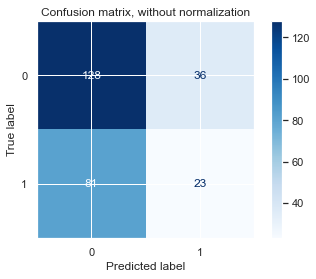

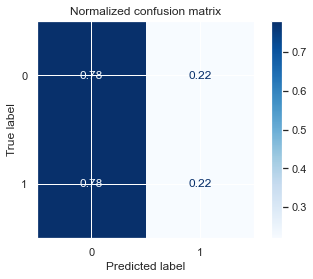

In [101]:
# Plotting both non-normalized and normalized confusion matrix
from sklearn.metrics import plot_confusion_matrix

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(DecisionTree, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

# Tuning Logistic Regression

In [102]:
grid = {"penalty":[ 'l2', 'elasticnet', None],
        "random_state" : [86],
        "warm_start" : ['True', 'False'],
        "n_jobs" : [1, -1]
       }

In [103]:
gridsearch = GridSearchCV(LR,grid, cv = 5)

In [104]:
gridsearch.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=6),
             param_grid={'n_jobs': [1, -1],
                         'penalty': ['l2', 'elasticnet', None],
                         'random_state': [86],
                         'warm_start': ['True', 'False']})

In [105]:
gridsearch.best_params_

{'n_jobs': 1, 'penalty': 'l2', 'random_state': 86, 'warm_start': 'True'}

In [106]:
model = LogisticRegression(n_jobs = 1, random_state = 86, warm_start = True, penalty = 'l2')

In [107]:
model.fit(X_train,y_train)

LogisticRegression(n_jobs=1, random_state=86, warm_start=True)

In [108]:
# Performing Evaluation metrics for our model
predmodel=model.predict(X_test)
print('Accuracy Score for Logistic Regression is :',round(accuracy_score(y_test,predmodel),4)*100,'% \n')
print('Confusion Matrix of Logistic Regression : \n',confusion_matrix(y_test,predmodel), '\n')
print('Classification Random Logistic Regression : \n',classification_report(y_test,predmodel))

Accuracy Score for Logistic Regression is : 58.209999999999994 % 

Confusion Matrix of Logistic Regression : 
 [[148  16]
 [ 96   8]] 

Classification Random Logistic Regression : 
               precision    recall  f1-score   support

           0       0.61      0.90      0.73       164
           1       0.33      0.08      0.12       104

    accuracy                           0.58       268
   macro avg       0.47      0.49      0.43       268
weighted avg       0.50      0.58      0.49       268



Confusion matrix, without normalization
[[148  16]
 [ 96   8]]
Normalized confusion matrix
[[0.90243902 0.09756098]
 [0.92307692 0.07692308]]


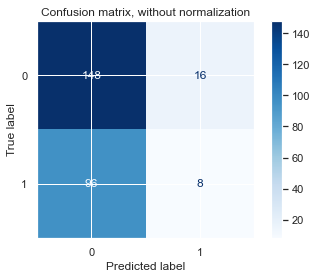

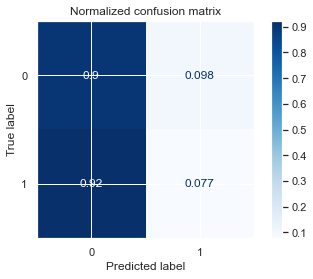

In [109]:
# Plotting both non-normalized and normalized confusion matrix
from sklearn.metrics import plot_confusion_matrix

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

# Tuning KNN

In [110]:
grid = {'n_neighbors' : [3,5,7,9,11,13],
       'weights': ['uniform','distance'],
       'algorithm' : ['auto','ball_tree','kd_tree','brute'],
       'n_jobs': [1,-1],
       'leaf_size' : [30,35,40]}

In [111]:
gridsearch = GridSearchCV(knn,grid, cv = 5)

In [112]:
gridsearch.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [30, 35, 40], 'n_jobs': [1, -1],
                         'n_neighbors': [3, 5, 7, 9, 11, 13],
                         'weights': ['uniform', 'distance']})

In [113]:
gridsearch.best_params_

{'algorithm': 'kd_tree',
 'leaf_size': 35,
 'n_jobs': 1,
 'n_neighbors': 9,
 'weights': 'distance'}

In [114]:
knn = KNeighborsClassifier(algorithm = 'ball_tree',leaf_size = 30,n_jobs=1,n_neighbors = 11, weights ='uniform')

In [115]:
knn.fit(X_train,y_train)


KNeighborsClassifier(algorithm='ball_tree', n_jobs=1, n_neighbors=11)

In [116]:
knn.score(X_test,y_test)


0.5746268656716418

In [117]:
# Performing Evaluation metrics for our model
knn1 =knn.predict(X_test)
print('Accuracy Score for SVC is :',round(accuracy_score(y_test,knn1),4)*100,'% \n')
print('Confusion Matrix of SVC: \n',confusion_matrix(y_test,knn1), '\n')
print('Classification SVC: \n',classification_report(y_test,knn1))
#

Accuracy Score for SVC is : 57.46 % 

Confusion Matrix of SVC: 
 [[133  31]
 [ 83  21]] 

Classification SVC: 
               precision    recall  f1-score   support

           0       0.62      0.81      0.70       164
           1       0.40      0.20      0.27       104

    accuracy                           0.57       268
   macro avg       0.51      0.51      0.48       268
weighted avg       0.53      0.57      0.53       268



Confusion matrix, without normalization
[[133  31]
 [ 83  21]]
Normalized confusion matrix
[[0.81097561 0.18902439]
 [0.79807692 0.20192308]]


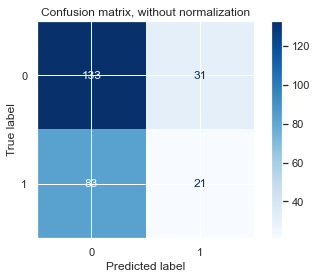

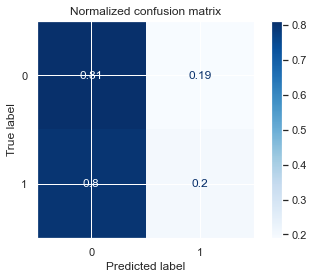

In [118]:
# Plotting both non-normalized and normalized confusion matrix
from sklearn.metrics import plot_confusion_matrix

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(knn, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

# Tuning SVC

In [119]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(svc, param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.616 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.616 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.616 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.621 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.621 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.616 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.616 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.616 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.621 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.621 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.616 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.528 total time=   0.0s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.581 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.524 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.560 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.600 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.504 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.597 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.524 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.616 total time=   0.1s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.656 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.528 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.613 total time=   0.1s
[CV 5/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [120]:
print(grid.best_estimator_)


SVC(C=0.1, gamma=1)


In [121]:
svc1 = SVC(C = 1, gamma = 0.0001, kernel = 'rbf')


In [122]:
svc1.fit(X_train,y_train)


SVC(C=1, gamma=0.0001)

In [123]:
svc1.score(X_test,y_test)

0.6119402985074627

In [124]:
# Performing Evaluation metrics for our model
pred1 =model.predict(X_test)
print('Accuracy Score for SVC is :',round(accuracy_score(y_test,pred1),4)*100,'% \n')
print('Confusion Matrix of SVC: \n',confusion_matrix(y_test,pred1), '\n')
print('Classification SVC: \n',classification_report(y_test,pred1))


Accuracy Score for SVC is : 58.209999999999994 % 

Confusion Matrix of SVC: 
 [[148  16]
 [ 96   8]] 

Classification SVC: 
               precision    recall  f1-score   support

           0       0.61      0.90      0.73       164
           1       0.33      0.08      0.12       104

    accuracy                           0.58       268
   macro avg       0.47      0.49      0.43       268
weighted avg       0.50      0.58      0.49       268



Confusion matrix, without normalization
[[148  16]
 [ 96   8]]
Normalized confusion matrix
[[0.90243902 0.09756098]
 [0.92307692 0.07692308]]


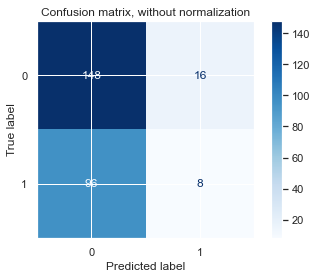

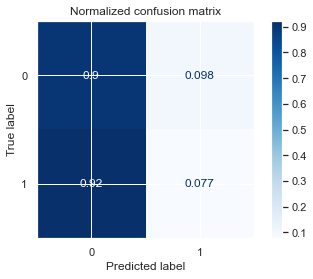

In [125]:
# Plotting both non-normalized and normalized confusion matrix
from sklearn.metrics import plot_confusion_matrix

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()


# Conclusion : SVC is the best model after hyperparameter tuning

Saving Model

In [126]:
joblib.dump(svc1,"TitanicSurvivalAnalysis.pkl")

['TitanicSurvivalAnalysis.pkl']

Loading Model

In [127]:
model = joblib.load("TitanicSurvivalAnalysis.pkl")

In [128]:
#predicting test data using loaded model and saving the results in a dataframe
prediction = model.predict(X_test)
prediction =   list(prediction)

In [129]:
Results = pd.DataFrame({})
Results['Actual Survival'] = y[:268]
Results['Predicted Survival'] = prediction
Results

,Actual Survival,Predicted Survival
0,0,0
1,1,0
2,1,0
3,1,0
4,0,0
...,...,...
263,0,0
264,0,0
265,0,0
266,0,0


In [130]:
#Converting the saved file into .csv format
Results.to_csv('Results.csv',index = False)